### Creacion de un indice comun basado en las volatilidades

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
data = pd.read_excel("./Base de datos/volatilidades.xlsx", index_col="Date")

data.head()

,S&P 500,Dow Jones Industrail Average,Nasdaq Composite,FTSE 100,Nikkei 225,HSI,Treasury Yield 10 Years,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures
Date,,,,,,,,,,,,,,
2000-08-31,1.500897,1.278588,3.734543,1.278923,1.464358,2.065155,0.931765,1.241404,0.810731,0.825850,1.454938,3.717197,1.484895,1.825290
2000-09-01,1.436940,1.241914,3.592262,1.233155,1.400235,1.999760,0.965443,1.223909,0.863122,0.866843,1.438043,3.584352,1.453881,1.861223
2000-09-05,1.335585,1.157986,3.368895,1.314010,1.360037,1.962668,0.978580,1.210593,0.869054,0.862689,1.439873,3.471951,1.432567,1.825265
2000-09-06,1.299739,1.081202,3.256320,1.254088,1.415488,1.932705,0.967412,1.258337,0.875260,0.858020,1.426644,3.424887,1.403768,1.795507
2000-09-07,1.278646,1.019866,3.263025,1.219148,1.357079,1.872265,0.964809,1.244992,0.883079,0.856883,1.435807,3.357853,1.422115,1.858962


Debido a la existencia de indices financiero y cotizaciones, es propicio estimar dos indices diferentes, del cual, el indice global ser el promedio

In [3]:
X = data.to_numpy()

X

array([[1.50089705, 1.27858838, 3.73454325, ..., 3.71719678, 1.48489492,
        1.82528967],
       [1.43694036, 1.2419139 , 3.59226165, ..., 3.5843516 , 1.4538807 ,
        1.86122287],
       [1.33558515, 1.15798617, 3.36889517, ..., 3.47195091, 1.43256695,
        1.82526515],
       ...,
       [1.3713364 , 1.07602328, 1.83300884, ..., 5.49103536, 1.3761365 ,
        1.88748711],
       [1.31401934, 1.07471981, 1.74601258, ..., 5.40913443, 1.35433125,
        1.85329932],
       [1.3251685 , 1.15466773, 1.68881833, ..., 5.38212375, 1.35220395,
        2.09414266]])

In [4]:
pca = PCA(n_components=1)
pca.fit(X)

PCA(n_components=1)

In [5]:
new = pca.transform(X) 

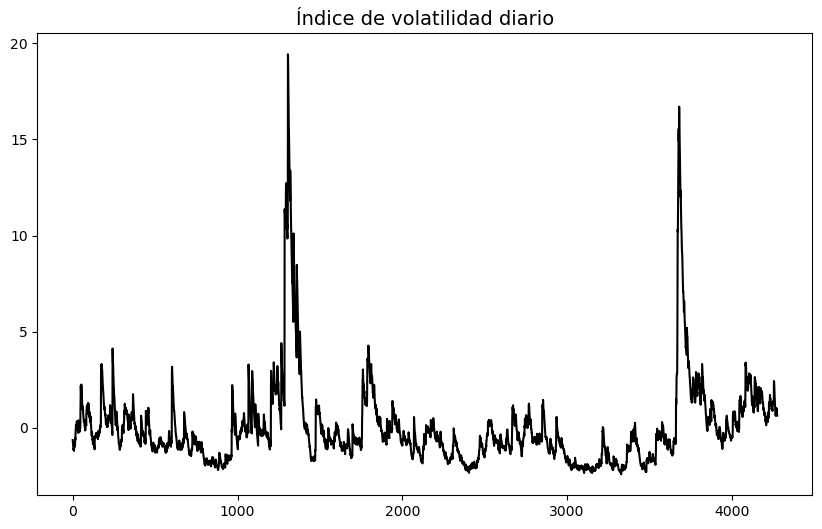

In [6]:
plt.figure(figsize=(10,6))
plt.plot(new, color="black")

plt.title("Índice de volatilidad diario", fontsize=14)

plt.savefig("./graphs/pca_daily.pdf")
plt.show()

In [7]:
data["PCA"] = new
pca_d = data[["PCA"]]

data.tail()

,S&P 500,Dow Jones Industrail Average,Nasdaq Composite,FTSE 100,Nikkei 225,HSI,Treasury Yield 10 Years,Copper Futures,Silver Futures,Gold Futures,Platinum Futures,Natural Gas Futures,Corn Futures,Soybean Meal Futures,PCA
Date,,,,,,,,,,,,,,,
2022-12-07,1.559084,1.219729,2.027095,0.700067,1.047244,2.482541,2.455446,1.893394,2.375468,1.124925,1.946756,5.721148,1.419424,1.843526,0.933869
2022-12-08,1.450776,1.137049,1.915757,0.694442,1.041897,2.531634,2.492207,1.862185,2.384799,1.118464,1.929145,5.615182,1.393570,1.899399,0.852694
2022-12-09,1.371336,1.076023,1.833009,0.675707,1.018660,2.572346,2.491774,1.821786,2.360170,1.100893,1.888001,5.491035,1.376137,1.887487,0.731636
2022-12-12,1.314019,1.074720,1.746013,0.651943,1.044580,2.545916,2.477812,1.778589,2.349391,1.087196,1.891797,5.409134,1.354331,1.853299,0.637120
2022-12-13,1.325168,1.154668,1.688818,0.651279,1.014117,2.522810,2.426934,1.790318,2.323608,1.087502,1.931923,5.382124,1.352204,2.094143,0.634408


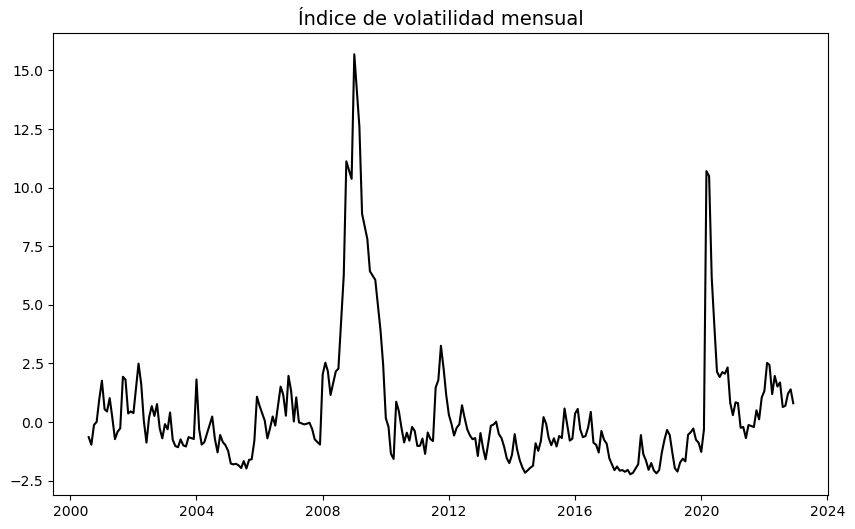

In [8]:
pca_m = data.groupby(data.index.strftime('%Y-%m')).PCA.agg(['mean'])
pca_m.index = pd.to_datetime(pca_m.index)
pca_m = pca_m.rename(columns={"mean": "PCA"})

plt.figure(figsize=(10,6))

plt.plot(pca_m, color="black")
plt.title("Índice de volatilidad mensual", fontsize=14)

plt.savefig("./graphs/pca_montly.pdf")
plt.show()

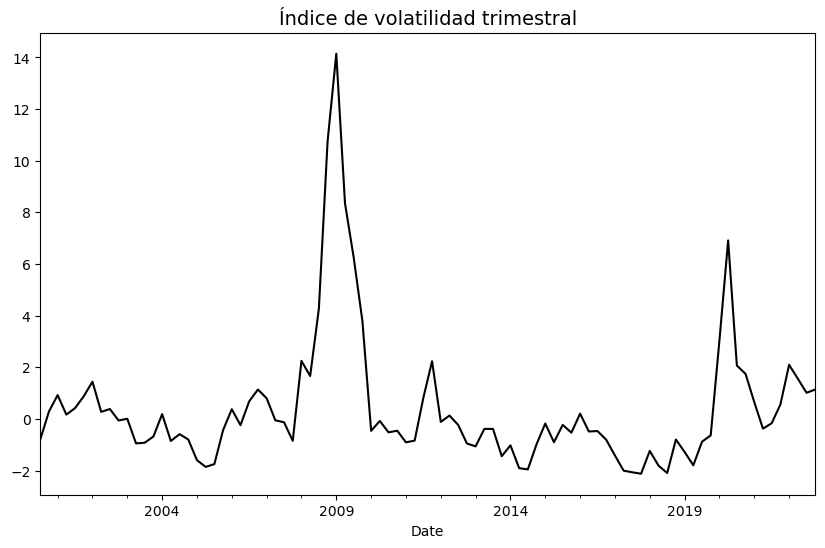

In [9]:
pca_q = pca_m.resample('Q').mean()

pca_q.plot(figsize=(10,6), color="black")
plt.title("Índice de volatilidad trimestral", fontsize=14)
plt.legend().remove()

plt.savefig("./graphs/pca_quarterly.pdf")
plt.show()

In [10]:
with pd.ExcelWriter("./Base de datos/PCA.xlsx") as writer:
    pca_d.to_excel(writer, sheet_name="Diario")
    pca_m.to_excel(writer, sheet_name="Mensual")
    pca_q.to_excel(writer, sheet_name="Trimestral")

### Comparativa con el CBOE Volatility Index (VIX)

In [11]:
vix = pd.read_excel("./Base de datos/vix.xlsx", sheet_name="Diario", index_col="Date")
vix.reset_index(inplace=True)

vix.tail()

,Date,VIX
5602,2022-12-07,22.680000
5603,2022-12-08,22.290001
5604,2022-12-09,22.830000
5605,2022-12-12,25.000000
5606,2022-12-13,23.299999


In [12]:
pca_d.reset_index(inplace=True)

pca_d.tail()

,Date,PCA
4271,2022-12-07,0.933869
4272,2022-12-08,0.852694
4273,2022-12-09,0.731636
4274,2022-12-12,0.637120
4275,2022-12-13,0.634408


In [13]:
df = pd.merge(pca_d, vix)
df.set_index("Date", inplace=True)

df

,PCA,VIX
Date,,
2000-08-31,-0.641904,16.840000
2000-09-01,-0.748412,17.530001
2000-09-05,-0.885129,19.820000
2000-09-06,-0.969803,20.790001
2000-09-07,-1.029902,19.420000
...,...,...
2022-12-07,0.933869,22.680000
2022-12-08,0.852694,22.290001
2022-12-09,0.731636,22.830000


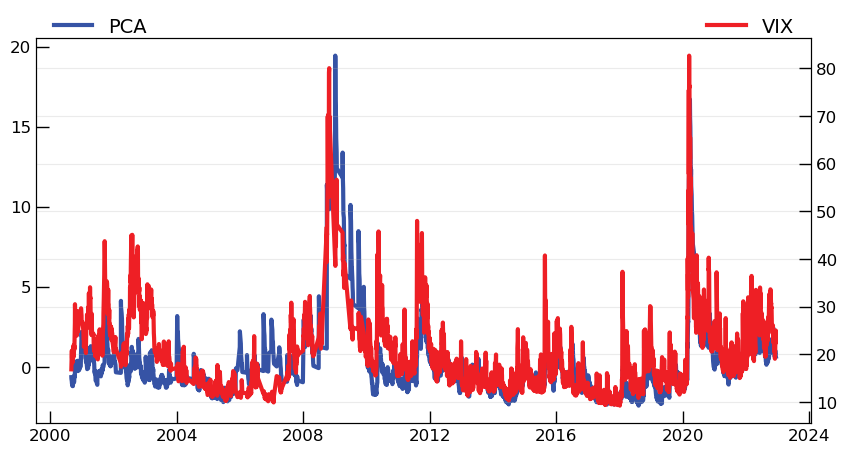

In [14]:
fig, ax1 = plt.subplots(figsize=(10, 5), linewidth = 2.5)
ax2 = ax1.twinx()

#Graficas
ax1.plot(df.index, df["PCA"], label="PCA", color = "#3653A5", linewidth = 3)
ax2.plot(df.index, df["VIX"], label="VIX", color = "#EE1F25", linewidth = 3)

#Posicionando las leyendas
ax1.legend(bbox_to_anchor=(0, 1.1), loc = 'upper left', fontsize=14, frameon=False)
ax2.legend(bbox_to_anchor=(1, 1.1), loc = 'upper right', fontsize=14, frameon=False)

#Editando los ticks
ax1.tick_params(direction='in', which='both', length=9, width=1, labelsize=12)
ax2.tick_params(direction='in', which='both', length=9, width=1, labelsize=12)

plt.grid(True, alpha=0.25)

plt.savefig("./graphs/comparativa.pdf")
plt.show()